In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
xor=pd.read_csv(r"C:\Users\HP\Downloads\Multiple CSV\Multiple CSV\7.xor.csv",header=None)

In [3]:
xor

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0
...,...,...,...
495,0.441033,0.178793,-1.0
496,-0.799422,0.240788,1.0
497,0.289121,0.412871,-1.0
498,-0.198399,0.094192,1.0


In [5]:
fv=xor.iloc[:,:2]
cv=xor.iloc[:,-1]

In [6]:
std=StandardScaler()
train_fv=std.fit_transform(fv)

<Axes: >

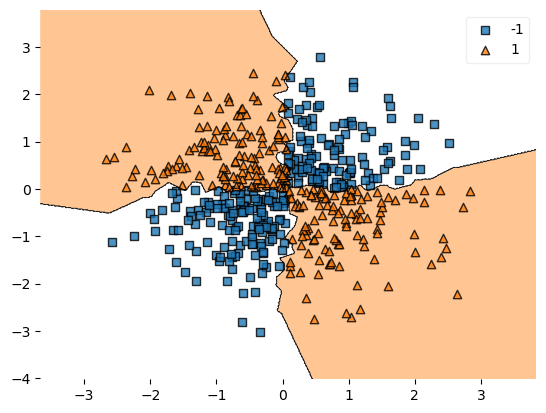

In [8]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(train_fv,cv.astype(int))
plot_decision_regions(X=train_fv,y=cv.astype(int).values,clf=knn)

<Axes: >

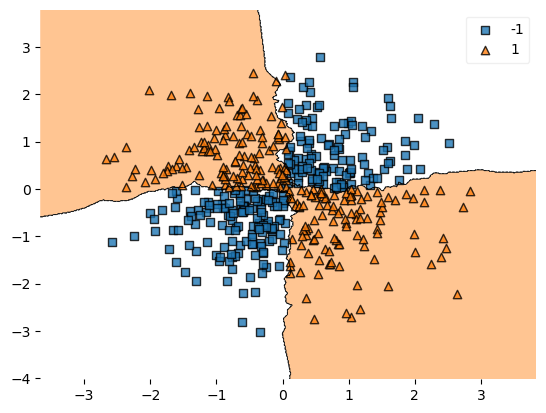

In [9]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(train_fv,cv.astype(int))
plot_decision_regions(X=train_fv,y=cv.astype(int).values,clf=knn)

<Axes: >

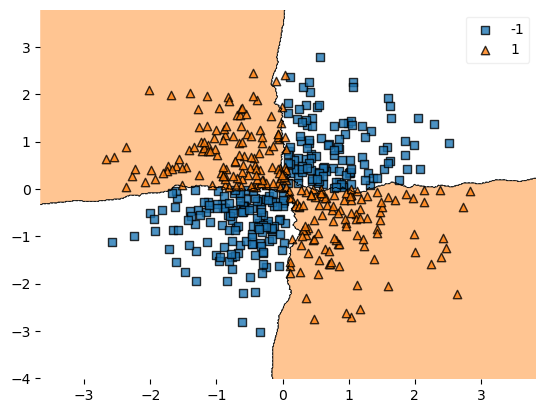

In [10]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(train_fv,cv.astype(int))
plot_decision_regions(X=train_fv,y=cv.astype(int).values,clf=knn)

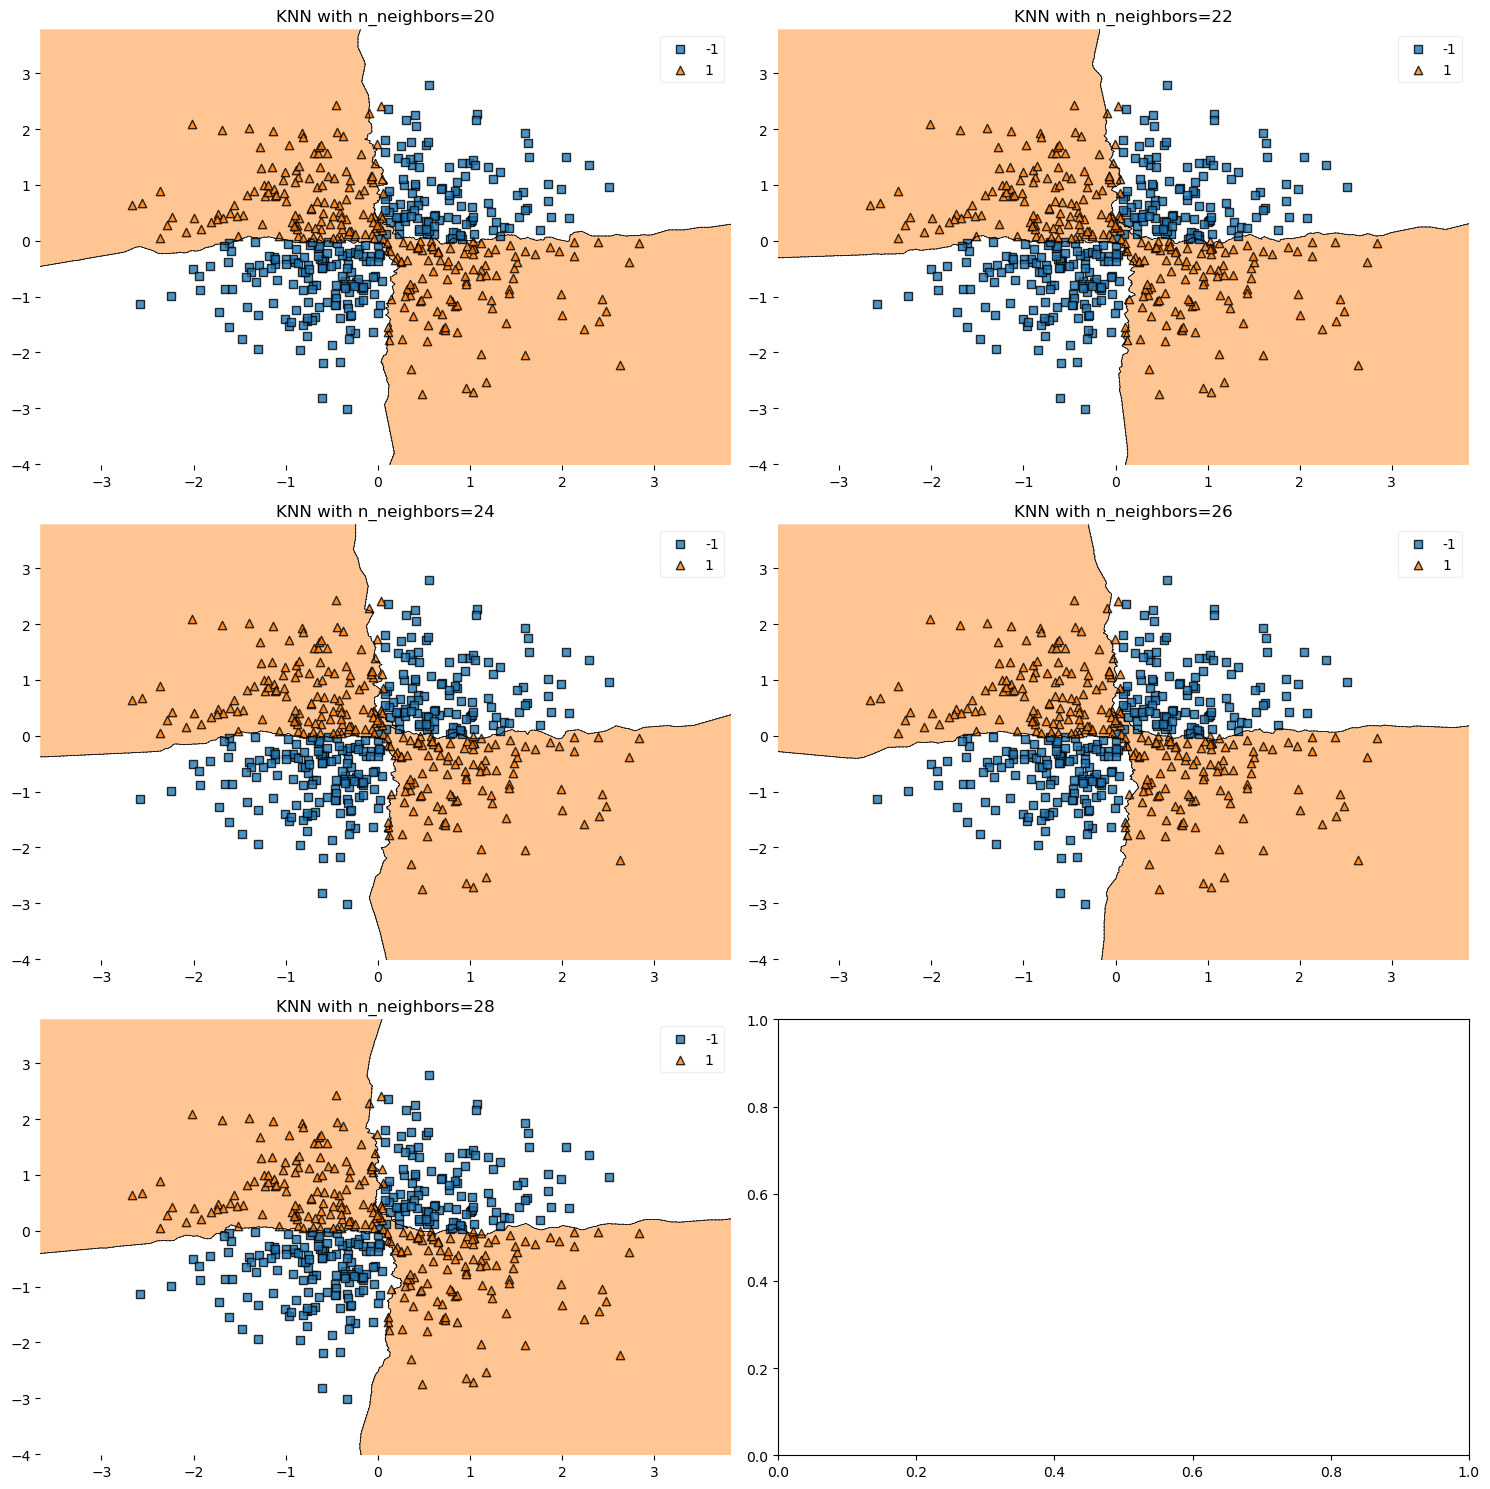

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(20,30, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_fv, cv.astype(int))
    plot_decision_regions(X=train_fv, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

In [11]:
xor

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0
...,...,...,...
495,0.441033,0.178793,-1.0
496,-0.799422,0.240788,1.0
497,0.289121,0.412871,-1.0
498,-0.198399,0.094192,1.0


In [12]:
fv=xor.iloc[:,:2]
cv=xor.iloc[:,-1]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,train_size=0.8,random_state=10,stratify=cv)

In [14]:
std=StandardScaler()
stand_x_train=std.fit_transform(x_train)
stand_x_test=std.transform(x_test)

In [15]:
knn=KNeighborsClassifier(n_neighbors=1)
learned_knn=knn.fit(stand_x_train,y_train)

In [16]:
predicted=learned_knn.predict(stand_x_test)

In [17]:
accuracy_score(y_test,predicted)

0.98

In [18]:
k=[]
accu=[]
error=[]
for n in range(1,300,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    learned_knn=knn.fit(stand_x_train,y_train)
    predicted=learned_knn.predict(stand_x_test)
    k.append(n)
    accu.append(accuracy_score(y_test,predicted))
    error.append(1-accuracy_score(y_test,predicted))

In [19]:
k

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199,
 201,
 203,
 205,
 207,
 209,
 211,
 213,
 215,
 217,
 219,
 221,
 223,
 225,
 227,
 229,
 231,
 233,
 235,
 237,
 239,
 241,
 243,
 245,
 247,
 249,
 251,
 253,
 255,
 257,
 259,
 261,
 263,
 265,
 267,
 269,
 271,
 273,
 275,
 277,
 279,
 281,
 283,
 285,
 287,
 289,
 291,
 293,
 295,
 297,
 299]

In [20]:
accu

[0.98,
 0.99,
 0.99,
 0.98,
 0.99,
 0.99,
 0.98,
 0.98,
 0.95,
 0.97,
 0.96,
 0.96,
 0.98,
 0.97,
 0.97,
 0.98,
 0.96,
 0.96,
 0.95,
 0.98,
 0.95,
 0.94,
 0.94,
 0.94,
 0.94,
 0.93,
 0.93,
 0.92,
 0.92,
 0.92,
 0.92,
 0.92,
 0.92,
 0.91,
 0.92,
 0.9,
 0.92,
 0.91,
 0.91,
 0.92,
 0.92,
 0.93,
 0.93,
 0.92,
 0.91,
 0.91,
 0.9,
 0.88,
 0.89,
 0.89,
 0.87,
 0.86,
 0.85,
 0.85,
 0.86,
 0.87,
 0.87,
 0.87,
 0.87,
 0.86,
 0.85,
 0.84,
 0.84,
 0.84,
 0.83,
 0.84,
 0.83,
 0.82,
 0.82,
 0.82,
 0.8,
 0.8,
 0.78,
 0.78,
 0.78,
 0.76,
 0.76,
 0.74,
 0.74,
 0.73,
 0.72,
 0.72,
 0.7,
 0.7,
 0.68,
 0.68,
 0.67,
 0.67,
 0.67,
 0.66,
 0.66,
 0.66,
 0.67,
 0.66,
 0.64,
 0.64,
 0.62,
 0.62,
 0.62,
 0.62,
 0.62,
 0.62,
 0.62,
 0.62,
 0.62,
 0.6,
 0.6,
 0.6,
 0.59,
 0.57,
 0.55,
 0.53,
 0.53,
 0.52,
 0.51,
 0.5,
 0.48,
 0.48,
 0.47,
 0.47,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.45,
 0.47,
 0.47,
 0.48,
 0.48,
 0.48,
 0.48,
 0.48,
 0.48,
 0.47,
 0.48,
 0.45,
 0.45,
 0

In [21]:
error

[0.020000000000000018,
 0.010000000000000009,
 0.010000000000000009,
 0.020000000000000018,
 0.010000000000000009,
 0.010000000000000009,
 0.020000000000000018,
 0.020000000000000018,
 0.050000000000000044,
 0.030000000000000027,
 0.040000000000000036,
 0.040000000000000036,
 0.020000000000000018,
 0.030000000000000027,
 0.030000000000000027,
 0.020000000000000018,
 0.040000000000000036,
 0.040000000000000036,
 0.050000000000000044,
 0.020000000000000018,
 0.050000000000000044,
 0.06000000000000005,
 0.06000000000000005,
 0.06000000000000005,
 0.06000000000000005,
 0.06999999999999995,
 0.06999999999999995,
 0.07999999999999996,
 0.07999999999999996,
 0.07999999999999996,
 0.07999999999999996,
 0.07999999999999996,
 0.07999999999999996,
 0.08999999999999997,
 0.07999999999999996,
 0.09999999999999998,
 0.07999999999999996,
 0.08999999999999997,
 0.08999999999999997,
 0.07999999999999996,
 0.07999999999999996,
 0.06999999999999995,
 0.06999999999999995,
 0.07999999999999996,
 0.08999999

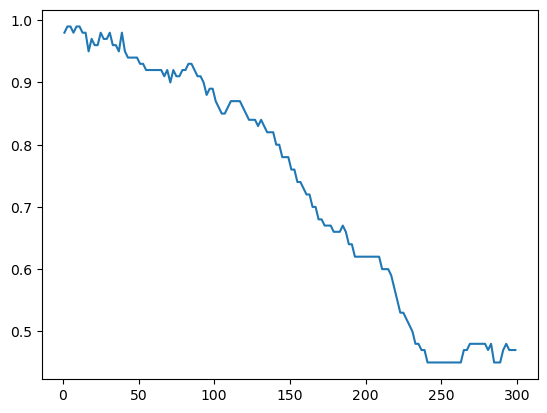

In [22]:
plt.plot(k,accu)

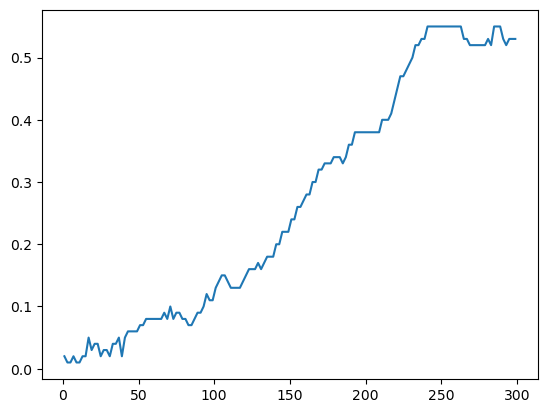

In [23]:
plt.plot(k,error)